In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv('Applications_for_Machine_Learning_internship_edited.csv')
df.head()

,Name,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,NaN,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021,NaN,6.50/7,NaN,NaN
1,NaN,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,NaN,8.90/10,NaN,NaN
2,NaN,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022,NaN,NaN,NaN,NaN
3,NaN,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...","Yes, I am available for 3 months starting imme...",Bachelor of Engineering (B.E),NaN,2024,NaN,NaN,85.60/85.60,10.00/10.00
4,NaN,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023,NaN,8.10/10,93.40/93.40,10.00/10.00


# Data Cleaning and Preprocessing

In [4]:
df1=df.drop(['Name'],axis='columns')
df1

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021,NaN,6.50/7,NaN,NaN
1,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,NaN,8.90/10,NaN,NaN
2,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022,NaN,NaN,NaN,NaN
3,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...","Yes, I am available for 3 months starting imme...",Bachelor of Engineering (B.E),NaN,2024,NaN,NaN,85.60/85.60,10.00/10.00
4,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023,NaN,8.10/10,93.40/93.40,10.00/10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,2,2,0,2,"Data Analytics, Amazon Web Services (AWS), Dat...","Yes, I am available for 3 months starting imme...",B.Tech,Mechanical Engineering,2021,NaN,NaN,NaN,NaN
1132,3,3,2,3,"Deep Learning, Docker, HTML, MS-Office, Machin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,NaN,NaN,NaN,NaN
1133,3,1,3,3,"Data Science, Deep Learning, English Proficien...","Yes, I am available for 3 months starting imme...",B.Tech,Electronics and Communication,2025,NaN,8.77/10,9.40/9.40,NaN
1134,2,1,0,0,"Python, Data Analytics, MS-Excel, Machine Lear...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2024,NaN,7.90/10,90.00/90.00,NaN


In [5]:
df1.isnull().sum()

Python (out of 3)                                                                                      0
Machine Learning (out of 3)                                                                            0
Natural Language Processing (NLP) (out of 3)                                                           0
Deep Learning (out of 3)                                                                               0
Other skills                                                                                          66
Are you available for 3 months, starting immediately, for a full-time work from home internship?       0
Degree                                                                                                43
Stream                                                                                               170
Current Year Of Graduation                                                                             0
Performance_PG                                         

In [6]:
df2=df1.dropna(subset = ['Other skills', 'Degree', 'Stream'])
df2.isnull().sum()

Python (out of 3)                                                                                      0
Machine Learning (out of 3)                                                                            0
Natural Language Processing (NLP) (out of 3)                                                           0
Deep Learning (out of 3)                                                                               0
Other skills                                                                                           0
Are you available for 3 months, starting immediately, for a full-time work from home internship?       0
Degree                                                                                                 0
Stream                                                                                                 0
Current Year Of Graduation                                                                             0
Performance_PG                                         

In [7]:
df2['Performance_PG'] = df2['Performance_PG'].fillna(0)
df2['Performance_UG'] = df2['Performance_UG'].fillna(0)
df2['Performance_10'] = df2['Performance_10'].fillna(0)
df2['Performance_12'] = df2['Performance_12'].fillna(0)
df2

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021,0,6.50/7,0,0
1,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,0,8.90/10,0,0
2,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022,0,0,0,0
4,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023,0,8.10/10,93.40/93.40,10.00/10.00
5,2,2,0,2,"Data Analytics, Data Science, MS-Excel, R Prog...","Yes, I am available for 3 months starting imme...",BS in Data Science and Applications,Statistics,2022,0,7.09/10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,2,2,0,2,"Data Analytics, Amazon Web Services (AWS), Dat...","Yes, I am available for 3 months starting imme...",B.Tech,Mechanical Engineering,2021,0,0,0,0
1132,3,3,2,3,"Deep Learning, Docker, HTML, MS-Office, Machin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,0,0,0,0
1133,3,1,3,3,"Data Science, Deep Learning, English Proficien...","Yes, I am available for 3 months starting imme...",B.Tech,Electronics and Communication,2025,0,8.77/10,9.40/9.40,0
1134,2,1,0,0,"Python, Data Analytics, MS-Excel, Machine Lear...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2024,0,7.90/10,90.00/90.00,0


In [8]:
print(df2.dtypes)#checking for datatypes

Python (out of 3)                                                                                     int64
Machine Learning (out of 3)                                                                           int64
Natural Language Processing (NLP) (out of 3)                                                          int64
Deep Learning (out of 3)                                                                              int64
Other skills                                                                                         object
Are you available for 3 months, starting immediately, for a full-time work from home internship?     object
Degree                                                                                               object
Stream                                                                                               object
Current Year Of Graduation                                                                            int64
Performance_PG              

In [15]:
df2['Performance_UG'] = df2['Performance_UG'].apply(lambda x: float(x.split('/')[0]) / float(x.split('/')[1]) if isinstance(x, str) and '/' in x else float(x))
df2['Performance_PG'] = df2['Performance_PG'].apply(lambda x: float(x.split('/')[0]) / float(x.split('/')[1]) if isinstance(x, str) and '/' in x else float(x))
df2['Performance_10'] = df2['Performance_10'].apply(lambda x: float(x.split('/')[0]) / float(x.split('/')[1]) if isinstance(x, str) and '/' in x else float(x))
df2['Performance_12'] = df2['Performance_12'].apply(lambda x: float(x.split('/')[0]) / float(x.split('/')[1]) if isinstance(x, str) and '/' in x else float(x))
df2.head(10)

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021,0.00000,0.928571,0.0,0.0
1,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,0.00000,0.890000,0.0,0.0
2,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022,0.00000,0.000000,0.0,0.0
4,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023,0.00000,0.810000,1.0,1.0
5,2,2,0,2,"Data Analytics, Data Science, MS-Excel, R Prog...","Yes, I am available for 3 months starting imme...",BS in Data Science and Applications,Statistics,2022,0.00000,0.709000,0.0,0.0
6,2,1,2,0,"C++ Programming, CSS, Data Analytics, HTML, MS...","Yes, I am available for 3 months starting imme...",B.Tech,Electronics and Telecommunication Engineering ...,2024,0.00000,0.869000,0.0,0.0
7,2,2,0,1,"Atmel AVR, Data Analytics, Data Science, MS-Ex...","Yes, I am available for 3 months starting imme...",PGP,Data Science And Machine Learning,2023,0.00000,0.680000,1.0,1.0
8,2,1,1,0,"C++ Programming, Data Analytics, Data Structur...","Yes, I am available for 3 months starting imme...",B.Tech,Information and Communication Technology,2023,0.00000,0.771000,1.0,1.0
9,2,2,0,1,"Android, Artificial Intelligence, C Programmin...","Yes, I am available for 3 months starting imme...",Bachelor of Technology (B.Tech),computer science,2025,0.85000,0.000000,0.0,0.0
10,2,0,0,0,"MS-Excel, MS-PowerPoint, Power BI, Python, R P...","Yes, I am available for 3 months starting imme...",MBA,Analytics And Finance,2023,0.93125,0.836500,1.0,1.0


In [18]:
df3=df2.copy()
df3['score'] = df3[['Performance_PG', 'Performance_UG', 'Performance_12', 'Performance_10']].mean(axis=1)
df3

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10,score
0,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021,0.0,0.928571,0.0,0.0,0.232143
1,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,0.0,0.890000,0.0,0.0,0.222500
2,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022,0.0,0.000000,0.0,0.0,0.000000
4,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023,0.0,0.810000,1.0,1.0,0.702500
5,2,2,0,2,"Data Analytics, Data Science, MS-Excel, R Prog...","Yes, I am available for 3 months starting imme...",BS in Data Science and Applications,Statistics,2022,0.0,0.709000,0.0,0.0,0.177250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,2,2,0,2,"Data Analytics, Amazon Web Services (AWS), Dat...","Yes, I am available for 3 months starting imme...",B.Tech,Mechanical Engineering,2021,0.0,0.000000,0.0,0.0,0.000000
1132,3,3,2,3,"Deep Learning, Docker, HTML, MS-Office, Machin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,0.0,0.000000,0.0,0.0,0.000000
1133,3,1,3,3,"Data Science, Deep Learning, English Proficien...","Yes, I am available for 3 months starting imme...",B.Tech,Electronics and Communication,2025,0.0,0.877000,1.0,0.0,0.469250
1134,2,1,0,0,"Python, Data Analytics, MS-Excel, Machine Lear...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2024,0.0,0.790000,1.0,0.0,0.447500


In [19]:
df4=df3.drop(['Performance_PG', 'Performance_UG', 'Performance_12', 'Performance_10'],axis='columns')
df4

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,score
0,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021,0.232143
1,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,0.222500
2,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022,0.000000
4,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023,0.702500
5,2,2,0,2,"Data Analytics, Data Science, MS-Excel, R Prog...","Yes, I am available for 3 months starting imme...",BS in Data Science and Applications,Statistics,2022,0.177250
...,...,...,...,...,...,...,...,...,...,...
1131,2,2,0,2,"Data Analytics, Amazon Web Services (AWS), Dat...","Yes, I am available for 3 months starting imme...",B.Tech,Mechanical Engineering,2021,0.000000
1132,3,3,2,3,"Deep Learning, Docker, HTML, MS-Office, Machin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,0.000000
1133,3,1,3,3,"Data Science, Deep Learning, English Proficien...","Yes, I am available for 3 months starting imme...",B.Tech,Electronics and Communication,2025,0.469250
1134,2,1,0,0,"Python, Data Analytics, MS-Excel, Machine Lear...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2024,0.447500


In [20]:
df4['RelevantSkillScore'] = df4[['Python (out of 3)', 'Machine Learning (out of 3)', 'Natural Language Processing (NLP) (out of 3)', 'Deep Learning (out of 3)']].sum(axis=1)
df4

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,score,RelevantSkillScore
0,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021,0.232143,2
1,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,0.222500,2
2,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022,0.000000,4
4,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023,0.702500,4
5,2,2,0,2,"Data Analytics, Data Science, MS-Excel, R Prog...","Yes, I am available for 3 months starting imme...",BS in Data Science and Applications,Statistics,2022,0.177250,6
...,...,...,...,...,...,...,...,...,...,...,...
1131,2,2,0,2,"Data Analytics, Amazon Web Services (AWS), Dat...","Yes, I am available for 3 months starting imme...",B.Tech,Mechanical Engineering,2021,0.000000,6
1132,3,3,2,3,"Deep Learning, Docker, HTML, MS-Office, Machin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,0.000000,11
1133,3,1,3,3,"Data Science, Deep Learning, English Proficien...","Yes, I am available for 3 months starting imme...",B.Tech,Electronics and Communication,2025,0.469250,10
1134,2,1,0,0,"Python, Data Analytics, MS-Excel, Machine Lear...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2024,0.447500,3


In [23]:
df6=df4.drop(['Python (out of 3)', 'Machine Learning (out of 3)', 'Natural Language Processing (NLP) (out of 3)', 'Deep Learning (out of 3)'],axis='columns')
df6

,Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,score,RelevantSkillScore
0,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021,0.232143,2
1,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,0.222500,2
2,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022,0.000000,4
4,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023,0.702500,4
5,"Data Analytics, Data Science, MS-Excel, R Prog...","Yes, I am available for 3 months starting imme...",BS in Data Science and Applications,Statistics,2022,0.177250,6
...,...,...,...,...,...,...,...
1131,"Data Analytics, Amazon Web Services (AWS), Dat...","Yes, I am available for 3 months starting imme...",B.Tech,Mechanical Engineering,2021,0.000000,6
1132,"Deep Learning, Docker, HTML, MS-Office, Machin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,0.000000,11
1133,"Data Science, Deep Learning, English Proficien...","Yes, I am available for 3 months starting imme...",B.Tech,Electronics and Communication,2025,0.469250,10
1134,"Python, Data Analytics, MS-Excel, Machine Lear...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2024,0.447500,3


In [21]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [24]:
df6['Cleaned'] = df4['Other skills'].apply(lambda x:cleanResume(x))
df6

,Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,score,RelevantSkillScore,Cleaned
0,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021,0.232143,2,MS Excel MS Word Deep Learning MySQL Python SQL
1,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,0.222500,2,Git GitHub Linux Adobe After Effects Adobe Ill...
2,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022,0.000000,4,Amazon Web Services AWS Docker Hadoop MS Excel...
4,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023,0.702500,4,C Programming Data Science Machine Learning Py...
5,"Data Analytics, Data Science, MS-Excel, R Prog...","Yes, I am available for 3 months starting imme...",BS in Data Science and Applications,Statistics,2022,0.177250,6,Data Analytics Data Science MS Excel R Program...
...,...,...,...,...,...,...,...,...
1131,"Data Analytics, Amazon Web Services (AWS), Dat...","Yes, I am available for 3 months starting imme...",B.Tech,Mechanical Engineering,2021,0.000000,6,Data Analytics Amazon Web Services AWS Data Sc...
1132,"Deep Learning, Docker, HTML, MS-Office, Machin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,0.000000,11,Deep Learning Docker HTML MS Office Machine Le...
1133,"Data Science, Deep Learning, English Proficien...","Yes, I am available for 3 months starting imme...",B.Tech,Electronics and Communication,2025,0.469250,10,Data Science Deep Learning English Proficiency...
1134,"Python, Data Analytics, MS-Excel, Machine Lear...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2024,0.447500,3,Python Data Analytics MS Excel Machine Learning


In [25]:
#getting the entire skills text
corpus=" "
for i in range(0,len(df6)):
    corpus= corpus+ df6["Cleaned"].iloc[i]

In [26]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chuck\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
#Tokenizing the text
tokens = tokenizer.tokenize(corpus)
len(tokens)

17204

In [28]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
words[0:5]

['ms', 'excel', 'ms', 'word', 'deep']

In [29]:
    # Vectorizing the cleaned columns
text = df6['Cleaned'].values
target = df6['RelevantSkillScore'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)

# Model training and building

In [30]:
WordFeatures.shape

(896, 378)

In [31]:
# Separate train and test data
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=24, test_size=0.2)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((716, 378), (180, 378), (716,), (180,))

In [33]:
# Model Training
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [34]:
# Prediction
y_pred = model.predict(X_test)

In [35]:
print(f'---------------------------------\n| Training Accuracy   :- {(model.score(X_train, y_train)*100).round(2)}% |')
print(f'---------------------------------\n| Validation Accuracy :- {(model.score(X_test, y_test)*100).round(2)}% |\n----------------')

---------------------------------
| Training Accuracy   :- 44.41% |
---------------------------------
| Validation Accuracy :- 15.56% |
----------------


In [36]:
print(metrics.classification_report(y_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         4

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [37]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [38]:
words_new[0:5]

['ms', 'excel', 'ms', 'word', 'deep']

In [41]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chuck\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [43]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
wn = WordNetLemmatizer() 
lem_words=[]
for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chuck\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
lem_words[0:5]

['m', 'excel', 'm', 'word', 'deep']

In [46]:
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 173
Number of words not Lemmatized= 1659


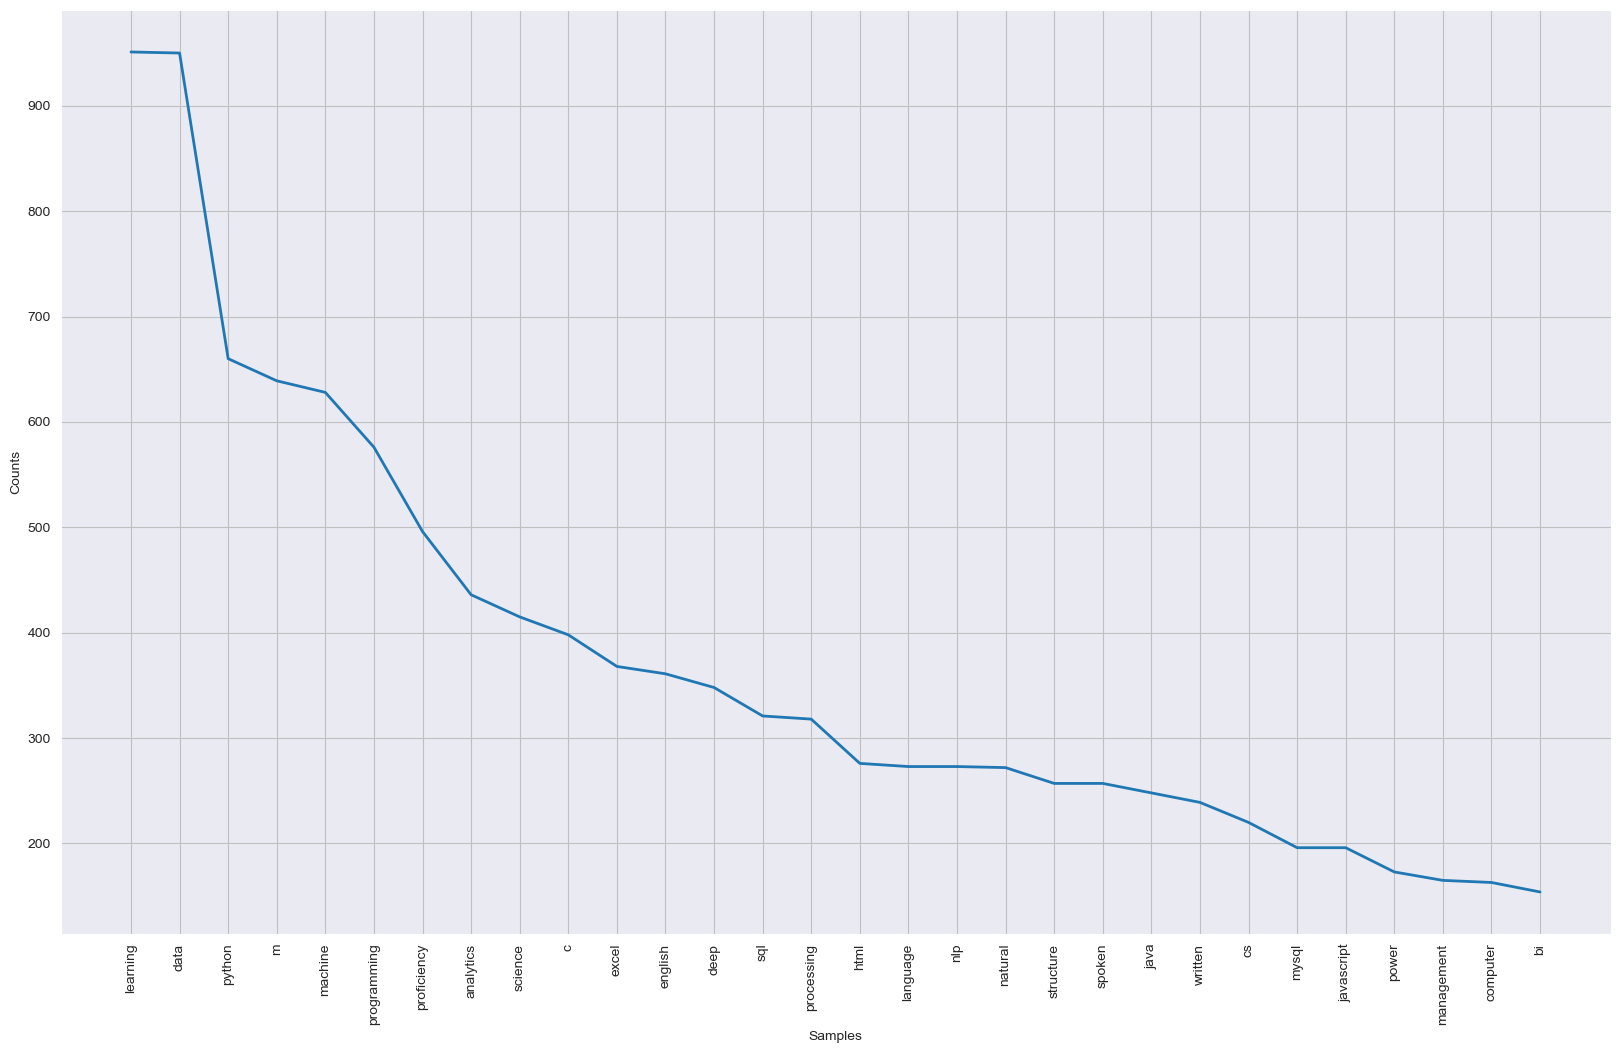

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [47]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(lem_words)
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [48]:
# Now we generate wordcloud
res=' '.join([i for i in lem_words if not i.isdigit()])

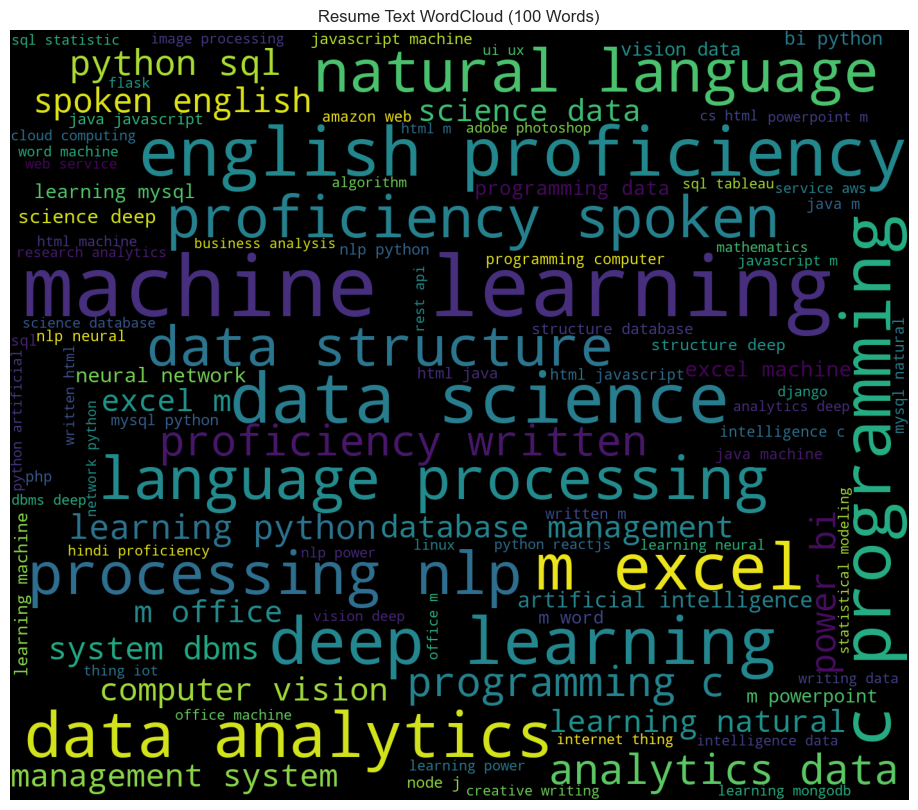

In [50]:

# Now we generate wordcloud
res=' '.join([i for i in lem_words if not i.isdigit()])
     

plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (100 Words)')
plt.axis('off')
plt.show()